# Загузка данных из csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df=pd.read_csv('Housing.csv')
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
print(df.shape)

(545, 13)


# Характеристика данных

In [4]:
display(df.describe())

,price,area,bedrooms,bathrooms,stories,parking
count,545.000,545.000,545.000,545.000,545.000,545.000
mean,4766729.248,5150.541,2.965,1.286,1.806,0.694
std,1870439.616,2170.141,0.738,0.502,0.867,0.862
min,1750000.000,1650.000,1.000,1.000,1.000,0.000
25%,3430000.000,3600.000,2.000,1.000,1.000,0.000
50%,4340000.000,4600.000,3.000,1.000,2.000,0.000
75%,5740000.000,6360.000,3.000,2.000,2.000,1.000
max,13300000.000,16200.000,6.000,4.000,4.000,3.000


In [5]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


# Поиск NULLов

In [7]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# Дополнение пустыми значениями

In [8]:
i = 1
for i in range(3):
    df.loc[len(df)] = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]

In [9]:
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.000,7420.000,4.000,2.000,3.000,yes,no,no,no,yes,2.000,yes,furnished
1,12250000.000,8960.000,4.000,4.000,4.000,yes,no,no,no,yes,3.000,no,furnished
2,12250000.000,9960.000,3.000,2.000,2.000,yes,no,yes,no,no,2.000,yes,semi-furnished
3,12215000.000,7500.000,4.000,2.000,2.000,yes,no,yes,no,yes,3.000,yes,furnished
4,11410000.000,7420.000,4.000,1.000,2.000,yes,yes,yes,no,yes,2.000,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1750000.000,2910.000,3.000,1.000,1.000,no,no,no,no,no,0.000,no,furnished
544,1750000.000,3850.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,unfurnished
545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Замена пустых значений

In [10]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.000,7420.000,4.000,2.000,3.000,yes,no,no,no,yes,2.000,yes,furnished
1,12250000.000,8960.000,4.000,4.000,4.000,yes,no,no,no,yes,3.000,no,furnished
2,12250000.000,9960.000,3.000,2.000,2.000,yes,no,yes,no,no,2.000,yes,semi-furnished
3,12215000.000,7500.000,4.000,2.000,2.000,yes,no,yes,no,yes,3.000,yes,furnished
4,11410000.000,7420.000,4.000,1.000,2.000,yes,yes,yes,no,yes,2.000,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1750000.000,2910.000,3.000,1.000,1.000,no,no,no,no,no,0.000,no,furnished
544,1750000.000,3850.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,unfurnished
545,4200000.000,6000.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,semi-furnished
546,4200000.000,6000.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,semi-furnished


# Дубликаты

In [12]:
display(df[df.duplicated()])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
546,4200000.000,6000.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,semi-furnished
547,4200000.000,6000.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,semi-furnished


# Выбросы

In [13]:
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df < lower_bound) | (df > upper_bound)

outliers = detect_outliers_iqr(df['price'])
print(f"Number of outliers detected: {sum(outliers)}")
outliers = detect_outliers_iqr(df['area'])
print(f"Number of outliers detected: {sum(outliers)}")

Number of outliers detected: 15
Number of outliers detected: 12


# Гистограммы

i:0, col:0, row:0
i:1, col:1, row:0


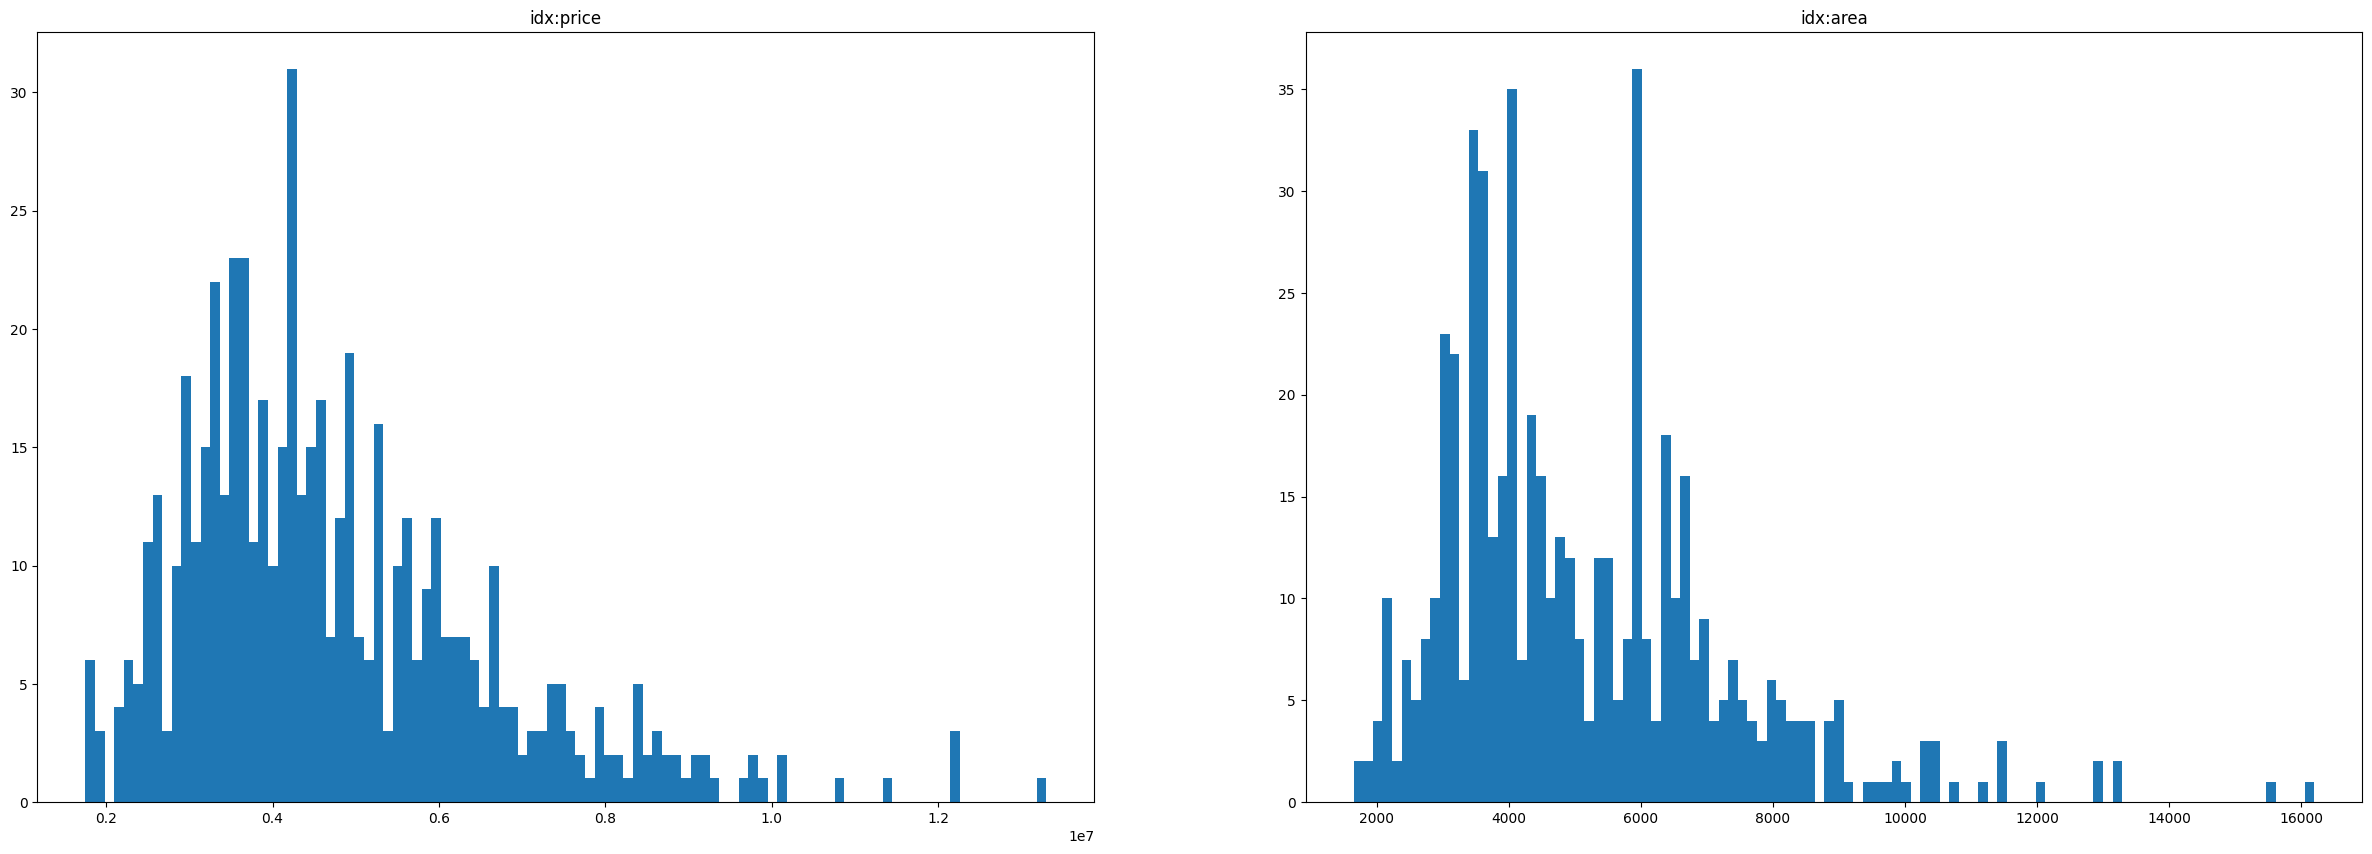

In [14]:
n_row = 1
n_col = 2

columns = list(df.columns[0:2])

fig, ax = plt.subplots(n_row, n_col, figsize=(30, 10))
ax

for idx in range(len(columns)):
    row = idx % n_row
    col = idx // n_row
    print(f'i:{idx}, col:{col}, row:{row}')

    ax[col].hist(df[columns[idx]],bins=100)
    ax[col].set_title(f"idx:{columns[idx]}")

plt.show()

i:0, col:0, row:0
i:1, col:0, row:1
i:2, col:1, row:0
i:3, col:1, row:1
i:4, col:2, row:0
i:5, col:2, row:1
i:6, col:3, row:0
i:7, col:3, row:1
i:8, col:4, row:0
i:9, col:4, row:1


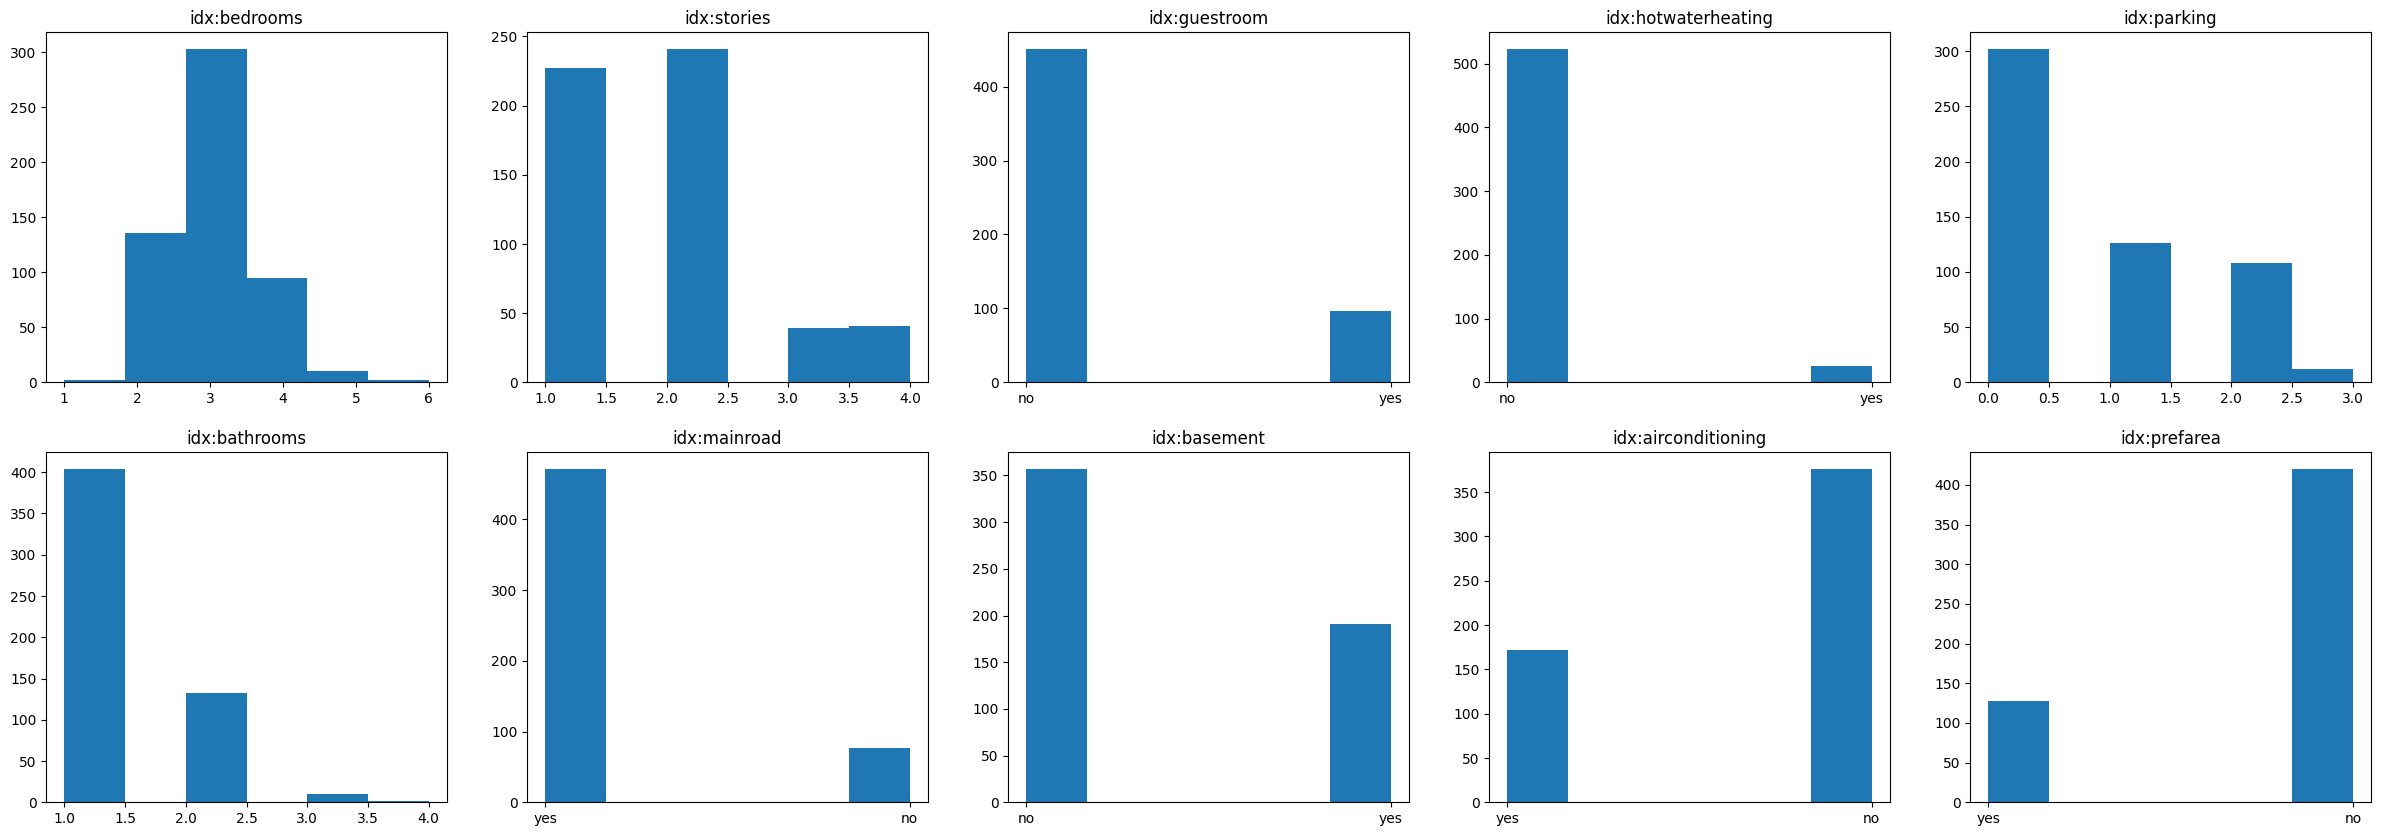

In [15]:
n_row = 2
n_col = 5

columns = list(df.columns[2:12])

fig, ax = plt.subplots(n_row, n_col, figsize=(30, 10))
ax

for idx in range(len(columns)):
    row = idx % n_row
    col = idx // n_row
    print(f'i:{idx}, col:{col}, row:{row}')

    ax[row,col].hist(df[columns[idx]],bins=6)
    ax[row,col].set_title(f"idx:{columns[idx]}")

plt.show()

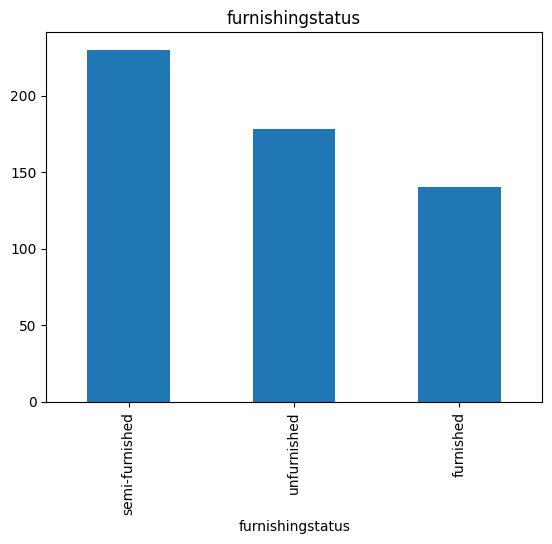

In [16]:
df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('furnishingstatus')
plt.show()

# Scatterplot

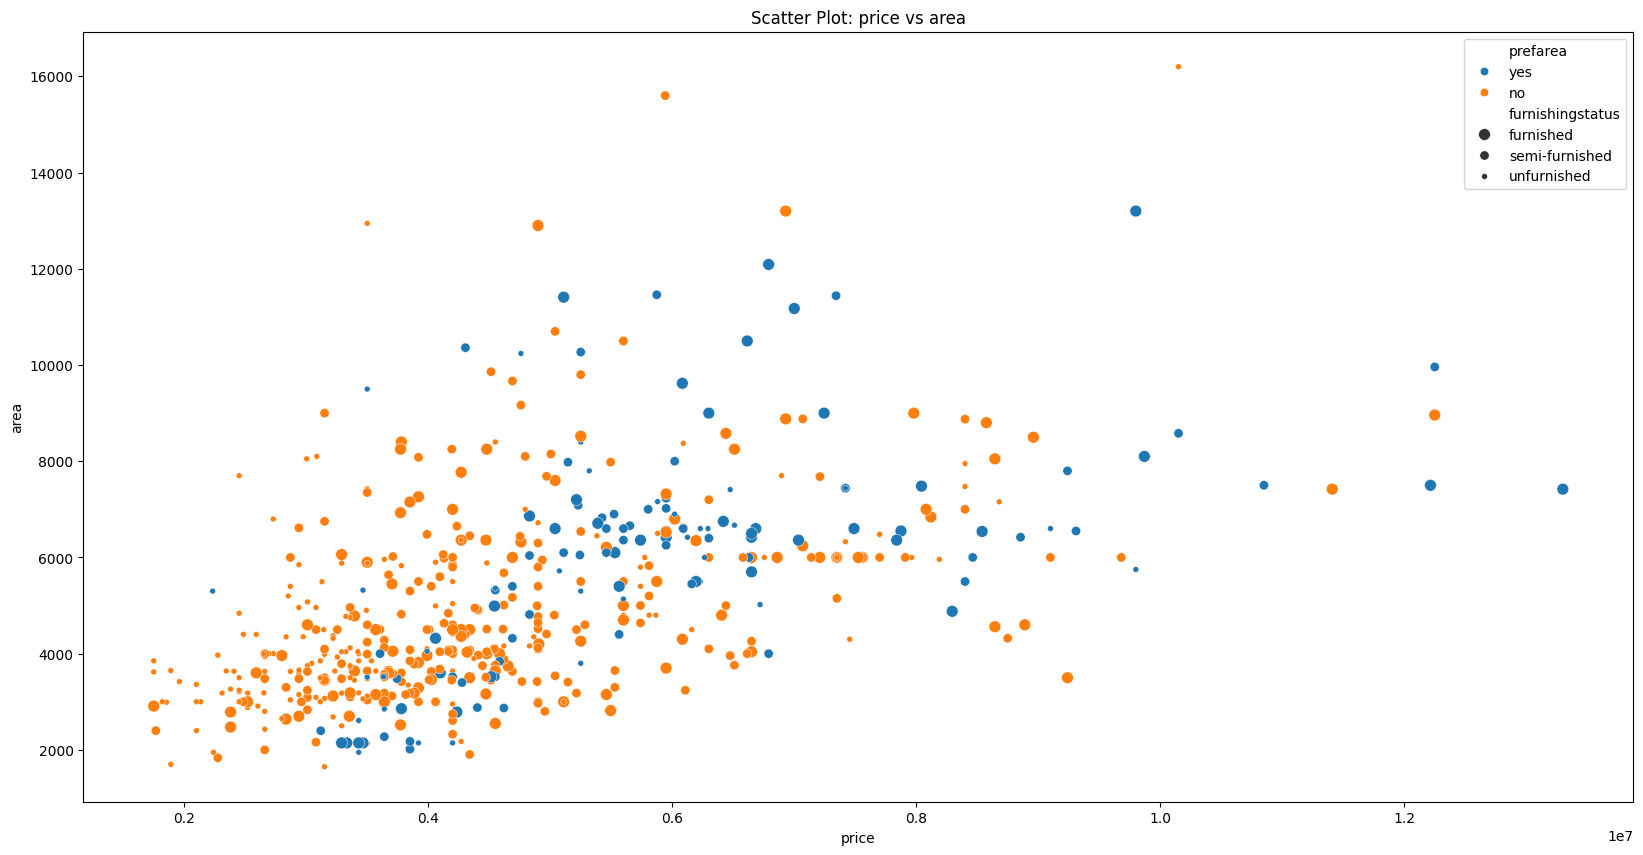

In [17]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='price', y='area', hue= 'prefarea', data=df,size='furnishingstatus')
plt.title('Scatter Plot: price vs area')
plt.show()

# Наиболее часто встречающиеся значения площади

In [18]:
df['area'].mode()

,area
0,6000.000


In [19]:
df.groupby('area', as_index=False).agg(
   cnt=('area', 'count')
).sort_values(['cnt'],ascending=False).head(10)

,area,cnt
183,6000.000,27
39,3000.000,14
126,4500.000,13
100,4000.000,11
166,5500.000,9
206,6600.000,9
71,3600.000,8
73,3630.000,7
49,3180.000,7
75,3640.000,7


Либо были построены какие то однотипные дома (например, коттеджный поселок), либо заполнены пустые значения средними значениями для определенных категорий домов

# Корреляционная матрица

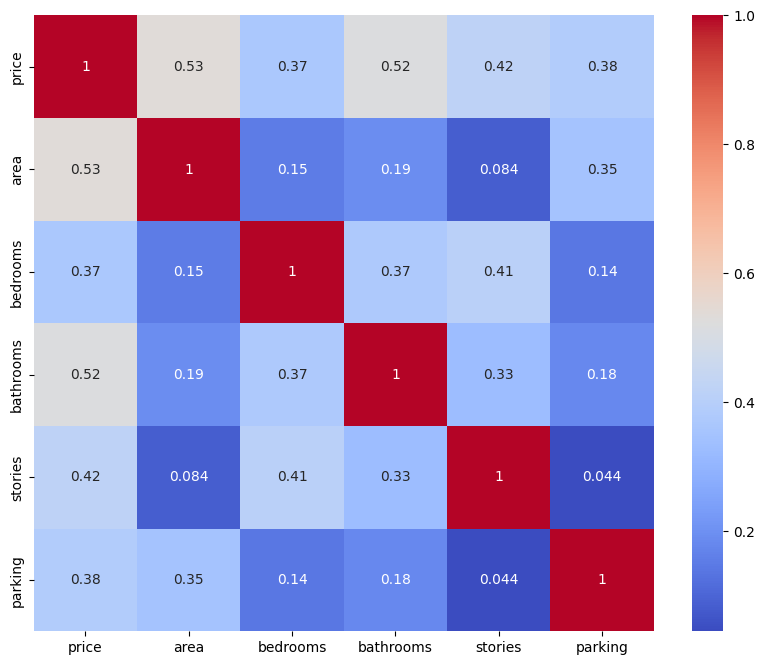

In [20]:
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Доверительные интервалы

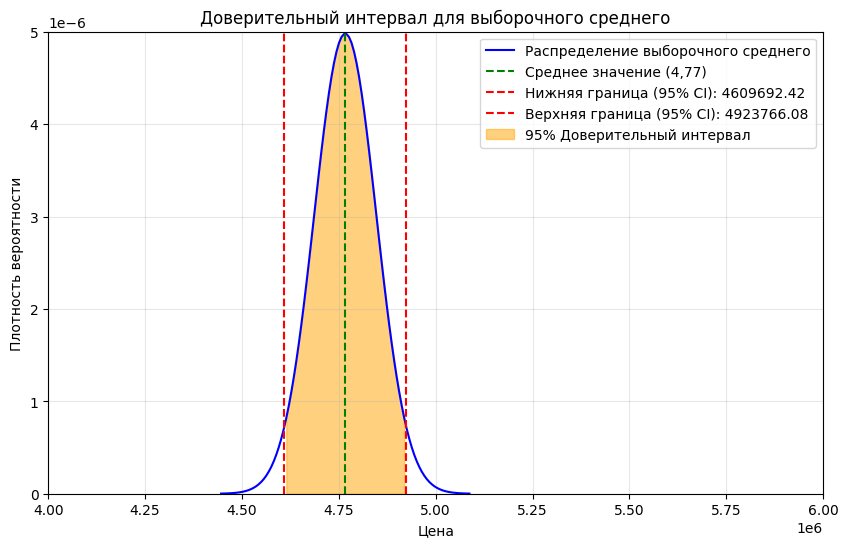

In [21]:
# Данные
sample_mean = 4766729.248  # Среднее значение выборки
sigma = 1870439.616         # Стандартное отклонение
n = 545            # Размер выборки
confidence_level = 0.95  # Уровень доверия
z = 1.96  # z-значение для 95%-го доверительного интервала

# Стандартная ошибка
se = sigma / np.sqrt(n)

# Доверительный интервал
lower_bound = sample_mean - z * se
upper_bound = sample_mean + z * se

# Генерация данных для графика
x = np.linspace(sample_mean - 4 * se, sample_mean + 4 * se, 100)
y = (1 / (np.sqrt(2 * np.pi) * se)) * np.exp(-0.5 * ((x - sample_mean) / se)**2)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Распределение выборочного среднего", color="blue")
plt.axvline(sample_mean, color="green", linestyle="--", label="Среднее значение (4,77)")
plt.axvline(lower_bound, color="red", linestyle="--", label=f"Нижняя граница (95% CI): {lower_bound:.2f}")
plt.axvline(upper_bound, color="red", linestyle="--", label=f"Верхняя граница (95% CI): {upper_bound:.2f}")
plt.fill_between(x, y, where=(x >= lower_bound) & (x <= upper_bound), color='orange', alpha=0.5, label="95% Доверительный интервал")

# Настройки графика
plt.title("Доверительный интервал для выборочного среднего")
plt.xlabel("Цена")
plt.ylabel("Плотность вероятности")
plt.xlim(4000000, 6000000)
plt.ylim(0, 0.000005)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Проверка гипотез

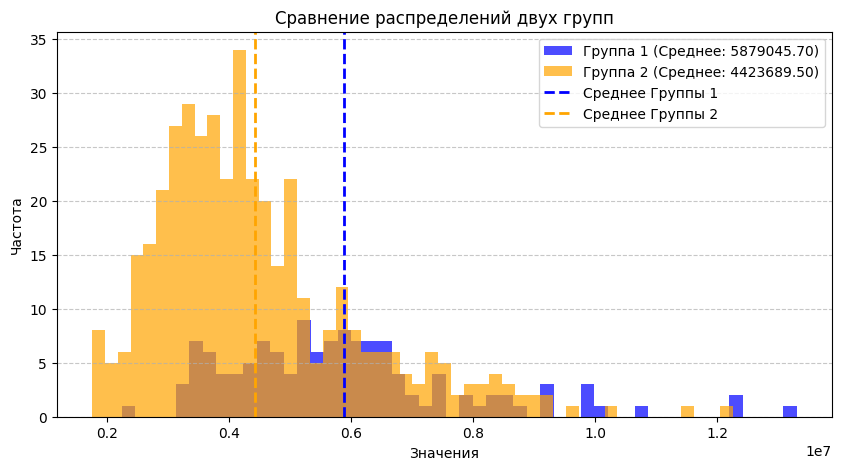

T-statistic: 8.177930453271383
P-value: 2.0338439998362747e-15

Гипотеза H0 отвергается: средние значения выборок отличаются.


In [26]:
from scipy import stats

# Сравнение среднего для цен домов в престижных районах и непрестижных районов
preferred_prices = df[df['prefarea'] == 'yes']['price']
non_preferred_prices = df[df['prefarea'] == 'no']['price']

t_statistic, p_value = stats.ttest_ind(preferred_prices, non_preferred_prices)

mean_preferred_prices = np.mean(preferred_prices)
mean_non_preferred_prices = np.mean(non_preferred_prices)

plt.figure(figsize=(10, 5))
plt.hist(preferred_prices, bins=50, color='blue', alpha=0.7, label=f"Группа 1 (Среднее: {mean_preferred_prices:.2f})")
plt.hist(non_preferred_prices, bins=50, color='orange', alpha=0.7, label=f"Группа 2 (Среднее: {mean_non_preferred_prices:.2f})")

plt.axvline(mean_preferred_prices, color='blue', linestyle='--', linewidth=2, label="Среднее Группы 1")
plt.axvline(mean_non_preferred_prices, color='orange', linestyle='--', linewidth=2, label="Среднее Группы 2")

plt.title("Сравнение распределений двух групп")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level
if p_value < alpha:
    print("\nГипотеза H0 отвергается: средние значения выборок отличаются.")
else:
    print("\nГипотеза H0 не отвергается: нет значимых отличий в выборках.")


=== Шапиро-Уилк тест ===

Для нормально распределенных данных:
Статистика: 0.921, p-значение: 0.0

Гипотеза о нормальности отвергается (данные распределены НЕ нормально)



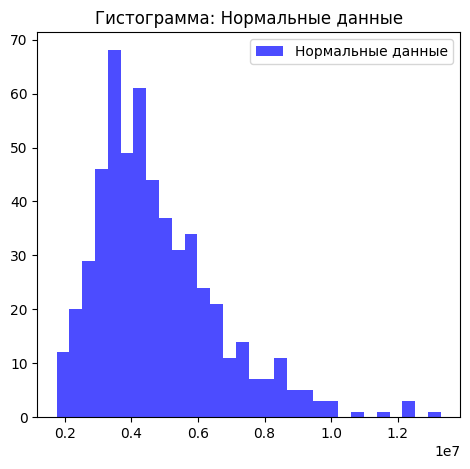

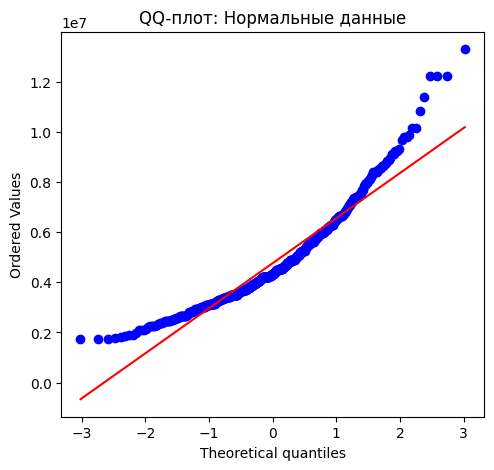

In [28]:
from scipy.stats import shapiro, probplot

# Генерация данных
np.random.seed(42)

# Нормально распределенные данные
data = df['price']

# Уровень значимости
alpha = 0.05

# === Проверка нормальности ===
print("=== Шапиро-Уилк тест ===")
print("\nДля нормально распределенных данных:")
shapiro_test_normal = shapiro(data)
print(f"Статистика: {round(shapiro_test_normal.statistic, 3)}, p-значение: {round(shapiro_test_normal.pvalue, 3)}")
if shapiro_test_normal.pvalue < alpha:
    print("\nГипотеза о нормальности отвергается (данные распределены НЕ нормально)\n")
else:
    print("\nГипотеза о нормальности НЕ отвергается (данные распределены нормально)\n")

# === Визуализация данных ===

# Гистограммы
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color="blue", alpha=0.7, label="Нормальные данные")
plt.title("Гистограмма: Нормальные данные")
plt.legend()

plt.show()

# QQ-плоты
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
probplot(data, dist="norm", plot=plt)
plt.title("QQ-плот: Нормальные данные")

plt.show()